In [0]:
import os
import glob
import cv2
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# [os.remove("GT/"+i) for i in os.listdir("GT") if "ignore" in i]

In [0]:
# <bbox_left>,<bbox_top>,<bbox_width>,<bbox_height>,<score>,<object_category>,<truncation>,<occlusion>
# for images
cols_img=["bbox_left","bbox_top","bbox_width","bbox_height","score","object_category","truncation","occlusion"]
# <frame_index>,<target_id>,<bbox_left>,<bbox_top>,<bbox_width>,<bbox_height>,<score>,<object_category>,<truncation>,<occlusion>
# for videos

In [0]:
text=pd.read_csv("od_images/VisDrone2019-DET-train/annotations/0000002_00005_d_0000014.txt",header=None)
text.columns=cols_img
text

,bbox_left,bbox_top,bbox_width,bbox_height,score,object_category,truncation,occlusion
0,684,8,273,116,0,0,0,0
1,406,119,265,70,0,0,0,0
2,255,22,119,128,0,0,0,0
3,1,3,209,78,0,0,0,0
4,708,471,74,33,1,4,0,1
5,639,425,61,46,1,4,0,0
6,594,399,64,51,1,4,0,0
7,562,390,61,38,1,4,0,0
8,540,372,65,33,1,4,0,1
9,514,333,68,35,1,4,0,0


In [0]:
colours={ind:(np.random.randint(255),np.random.randint(255),np.random.randint(255)) for ind in text.object_category.value_counts().index}
colours

{0: (112, 208, 172),
 1: (149, 167, 241),
 2: (16, 58, 195),
 3: (243, 221, 241),
 4: (205, 124, 247),
 5: (252, 150, 151),
 6: (247, 236, 67),
 7: (233, 121, 78),
 8: (51, 225, 72),
 10: (203, 179, 16),
 11: (175, 208, 229)}

In [0]:
text.score.value_counts()

1    82
0     6
Name: score, dtype: int64

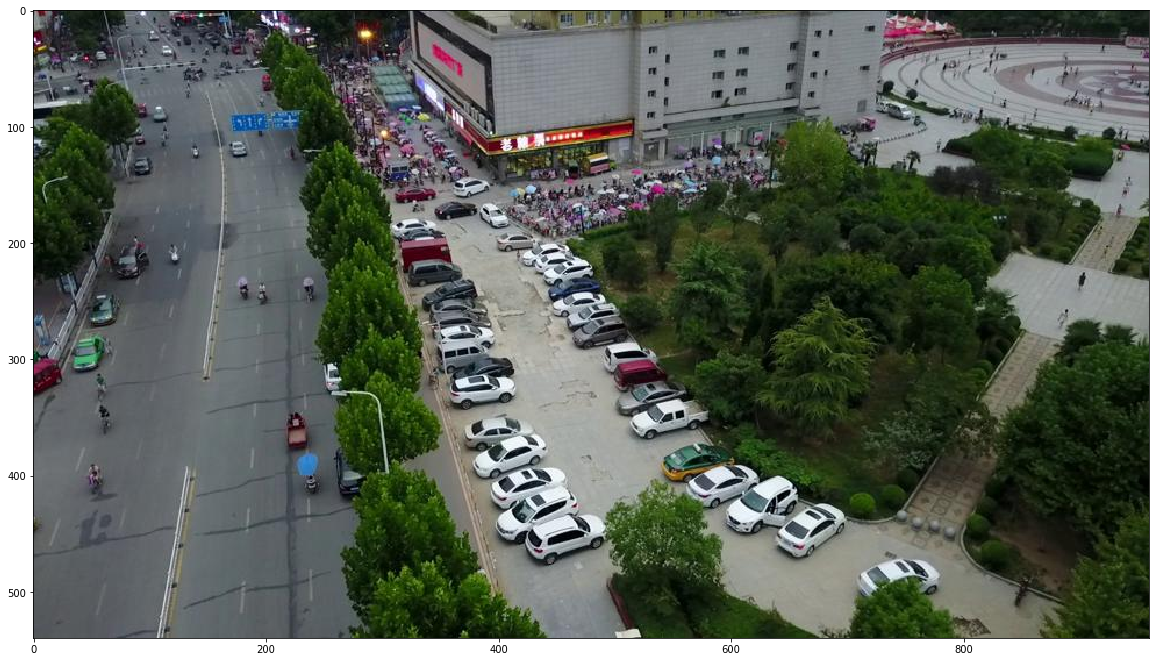

In [0]:
img_path="od_images/VisDrone2019-DET-train/images/0000002_00005_d_0000014.jpg"
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,15))
plt.imshow(img)

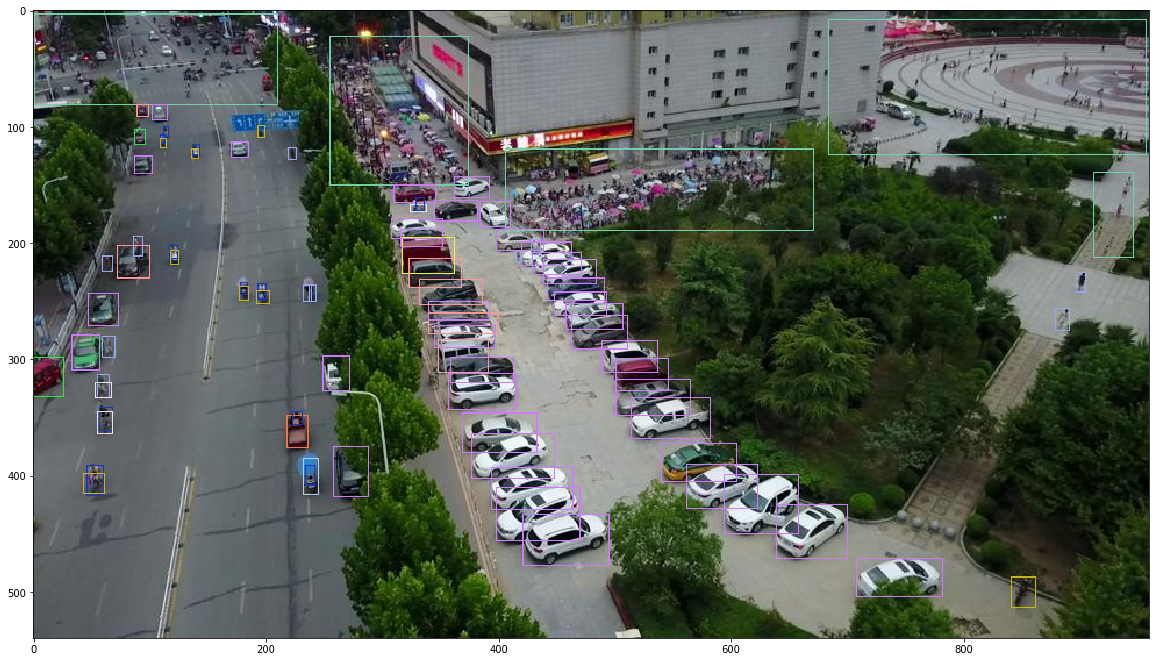

In [0]:
img_=img.copy()
for row in text.values:
    cv2.rectangle(img_,(row[2-2],row[3-2]),(row[2-2]+row[4-2],row[3-2]+row[5-2])
                  ,colours[row[5]]
                  ,1)
plt.figure(figsize=(20,15))
plt.imshow(img_)

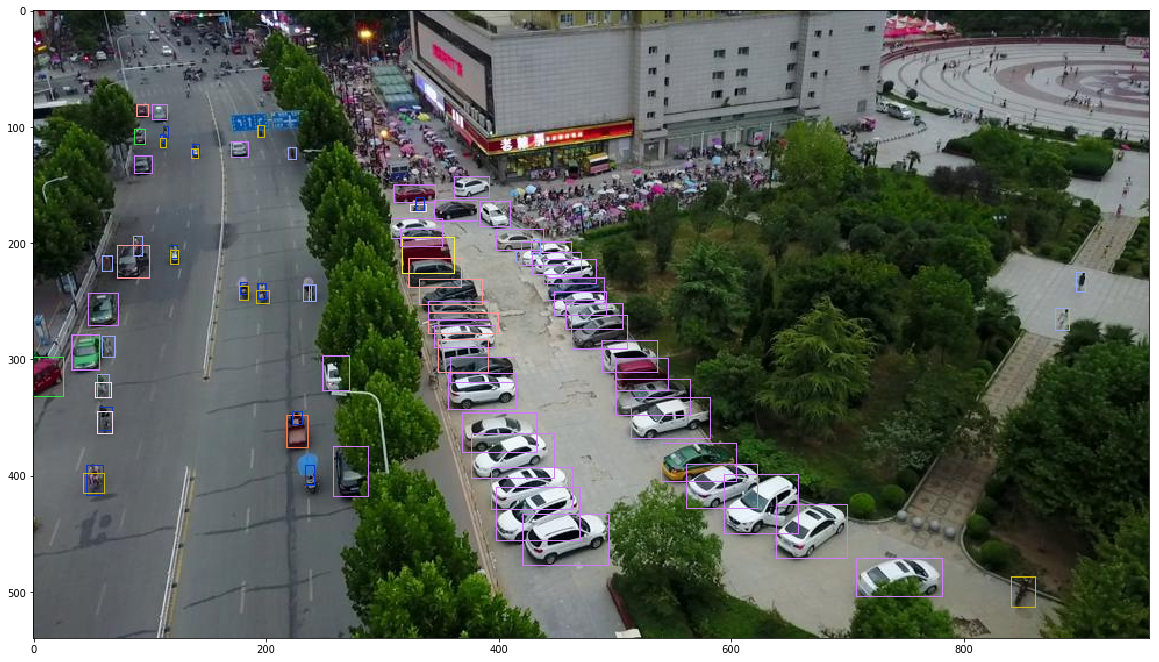

In [0]:
img__=img.copy()
text_=text.loc[text['score']!=0]
for row in text_.values:
    cv2.rectangle(img__,(row[2-2],row[3-2]),(row[2-2]+row[4-2],row[3-2]+row[5-2])
                  ,colours[row[5]]
                  ,1)
plt.figure(figsize=(20,15))
plt.imshow(img__)

In [0]:
text_

,bbox_left,bbox_top,bbox_width,bbox_height,score,object_category,truncation,occlusion
4,708,471,74,33,1,4,0,1
5,639,425,61,46,1,4,0,0
6,594,399,64,51,1,4,0,0
7,562,390,61,38,1,4,0,0
8,540,372,65,33,1,4,0,1
9,514,333,68,35,1,4,0,0
10,501,317,64,31,1,4,0,1
11,501,299,45,28,1,4,0,1
12,489,284,48,27,1,4,0,1
13,463,262,48,29,1,4,0,0
